In [1]:
from tensorflow.keras.datasets import fashion_mnist

# 데이터 다운
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sample_size = 9
# 0 ~ 59999의 범위 내 무작위 3개의 정수
random_idx = np.random.randint(60000, size=sample_size) 

# 0 ~ 1 범위로
x_train = np.reshape(x_train / 255, (-1, 28, 28, 1))
x_test = np.reshape(x_test / 255, (-1, 28, 28, 1))

from tensorflow.keras.utils import to_categorical
# 각 데이터의 레이블, 범주형 형태로 변경
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 검증 데이터셋 생성
from sklearn.model_selection import train_test_split

# 훈련/테스트 데이터 0.7/0.3의 비율로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size = 0.3, random_state = 777)

print('Fashion-MNIST ready~')

4423680/4422102 [==============================] - 0s 0us/step
Fashion-MNIST ready~


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

# 리스트 형태로 층을 구성
model = Sequential([
    # 항상 모델의 첫 번째 층은 입력의 형태 명시
    Conv2D(filters = 16, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'),  
    Conv2D(filters = 32, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'), 
    Conv2D(filters = 64, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'), 
    Flatten(), # Dense 층에 입력하기 위해 데이터를 펼쳐줌.
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax') # 10개의 출력을 가지는 신경망
])

In [3]:
##모델 학습시키기 

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

model.fit(x_train, y_train, 
          epochs = 30, 
          batch_size = 32, 
          validation_data = (x_val, y_val))

Epoch 1/30
1313/1313 [==============================] - 42s 32ms/step - loss: 0.5156 - acc: 0.8118 - val_loss: 0.3479 - val_acc: 0.8771
Epoch 2/30
1313/1313 [==============================] - 42s 32ms/step - loss: 0.3181 - acc: 0.8823 - val_loss: 0.2860 - val_acc: 0.8978
Epoch 3/30
1313/1313 [==============================] - 41s 31ms/step - loss: 0.2722 - acc: 0.8994 - val_loss: 0.2738 - val_acc: 0.9008
Epoch 4/30
1313/1313 [==============================] - 41s 31ms/step - loss: 0.2418 - acc: 0.9095 - val_loss: 0.2498 - val_acc: 0.9095
Epoch 5/30
1313/1313 [==============================] - 41s 32ms/step - loss: 0.2194 - acc: 0.9203 - val_loss: 0.2632 - val_acc: 0.9063
Epoch 6/30
1313/1313 [==============================] - 42s 32ms/step - loss: 0.1998 - acc: 0.9266 - val_loss: 0.2528 - val_acc: 0.9094
Epoch 7/30
1313/1313 [==============================] - 42s 32ms/step - loss: 0.1831 - acc: 0.9327 - val_loss: 0.2334 - val_acc: 0.9191
Epoch 8/30
1313/1313 [==========================

In [4]:
#모델 구조 확인 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

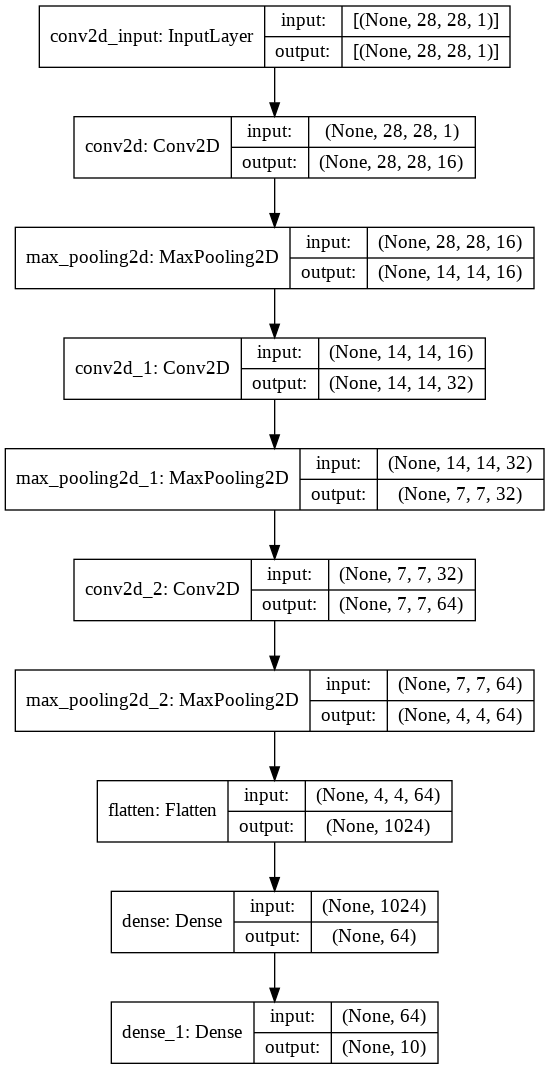

In [6]:
##PLOT_MODEL 함수 사용 

from tensorflow.keras.utils import plot_model
plot_model(model, './model.png', show_shapes=True)